In [1]:
# Autoencoder reconstruction best 10 worst 10 and a distribution

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")
from os.path import join
from results import prefix

# Results
import results
results = reload(results)

In [25]:
ID = 28
date = '2016_08_02'
group = 'test'

try:
    Results = results.Results
    r = Results(date, ID,local=True,experiment_group=group)
    print join('/home/luka/v/lm1015-tmp/data',join(date,group+'_'+prefix(ID,3)))
except IOError as io:
    print io
except AttributeError as ae:
    print ae

/home/luka/v/lm1015-tmp/data/2016_08_02/test_028


Mean squared error for autoencoder on test set:
final : 0.13272 0.13249
early : 0.16791 0.16775


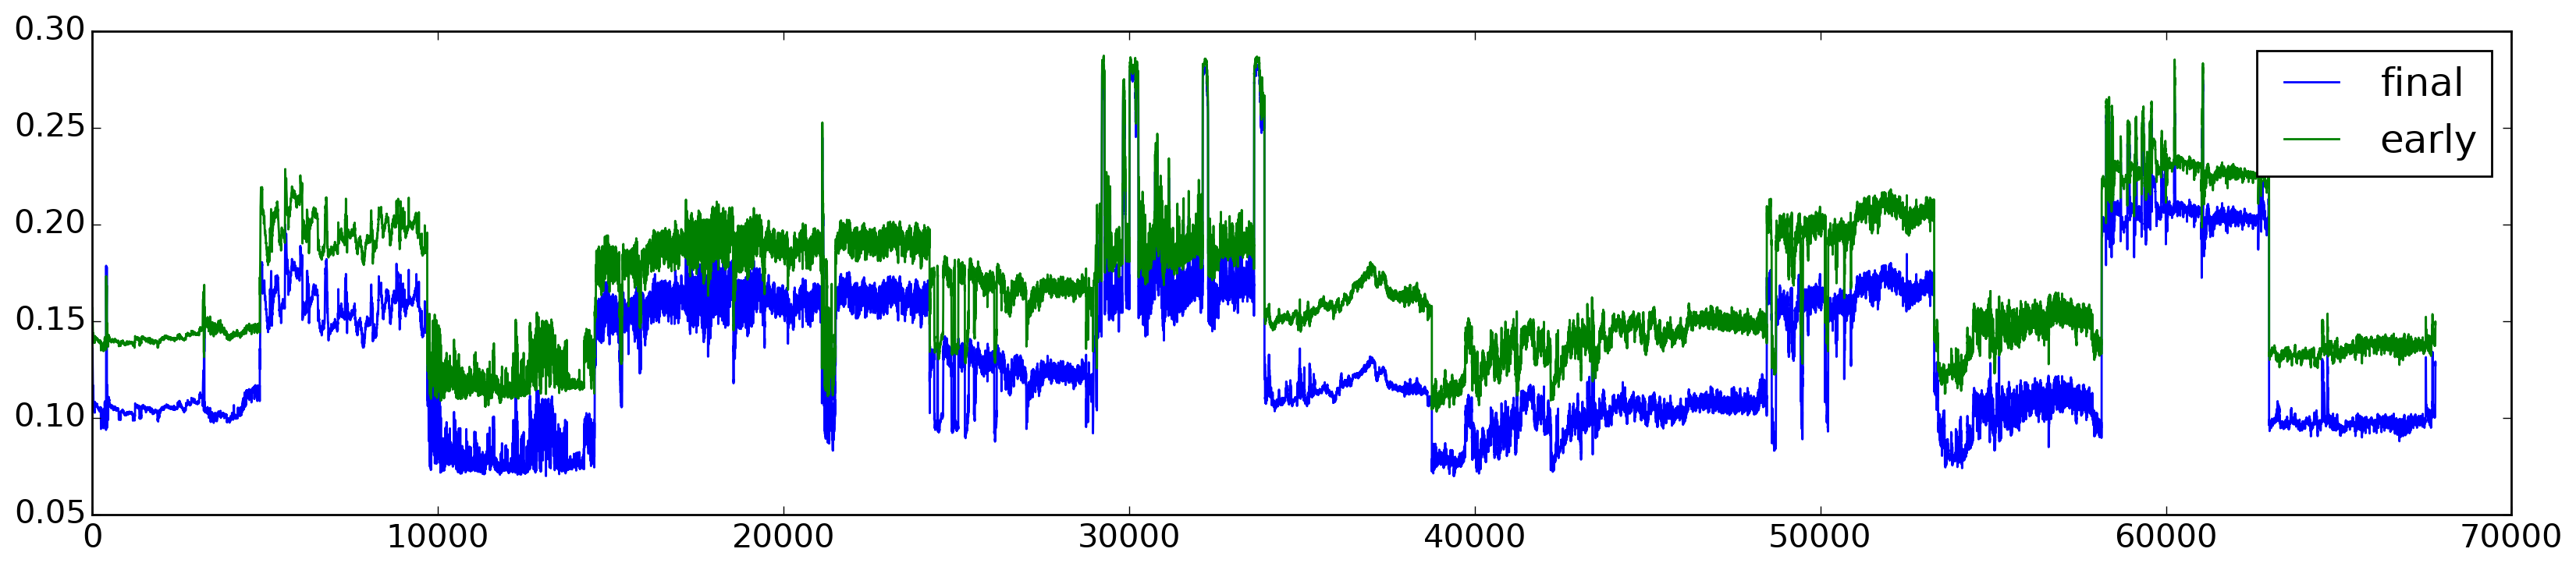

In [26]:
r.print_auto_results()
plt.figure()
plt.plot(r.final_model['true_losses'],label='final')
plt.plot(r.early_model['true_losses'],label='early')
plt.legend()

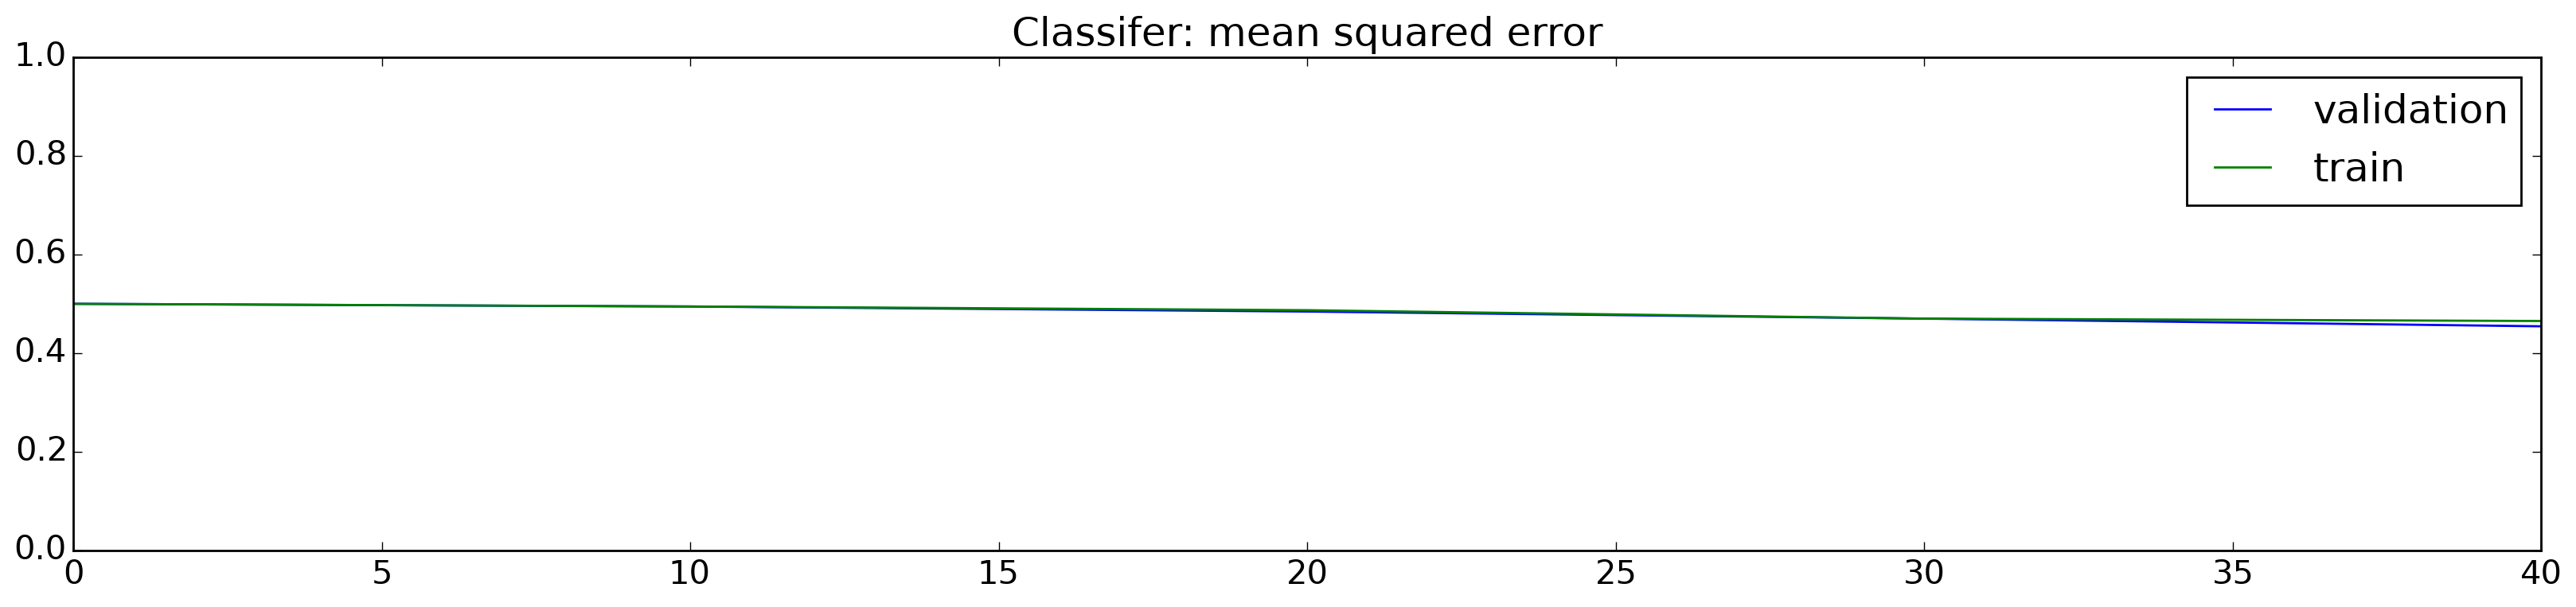

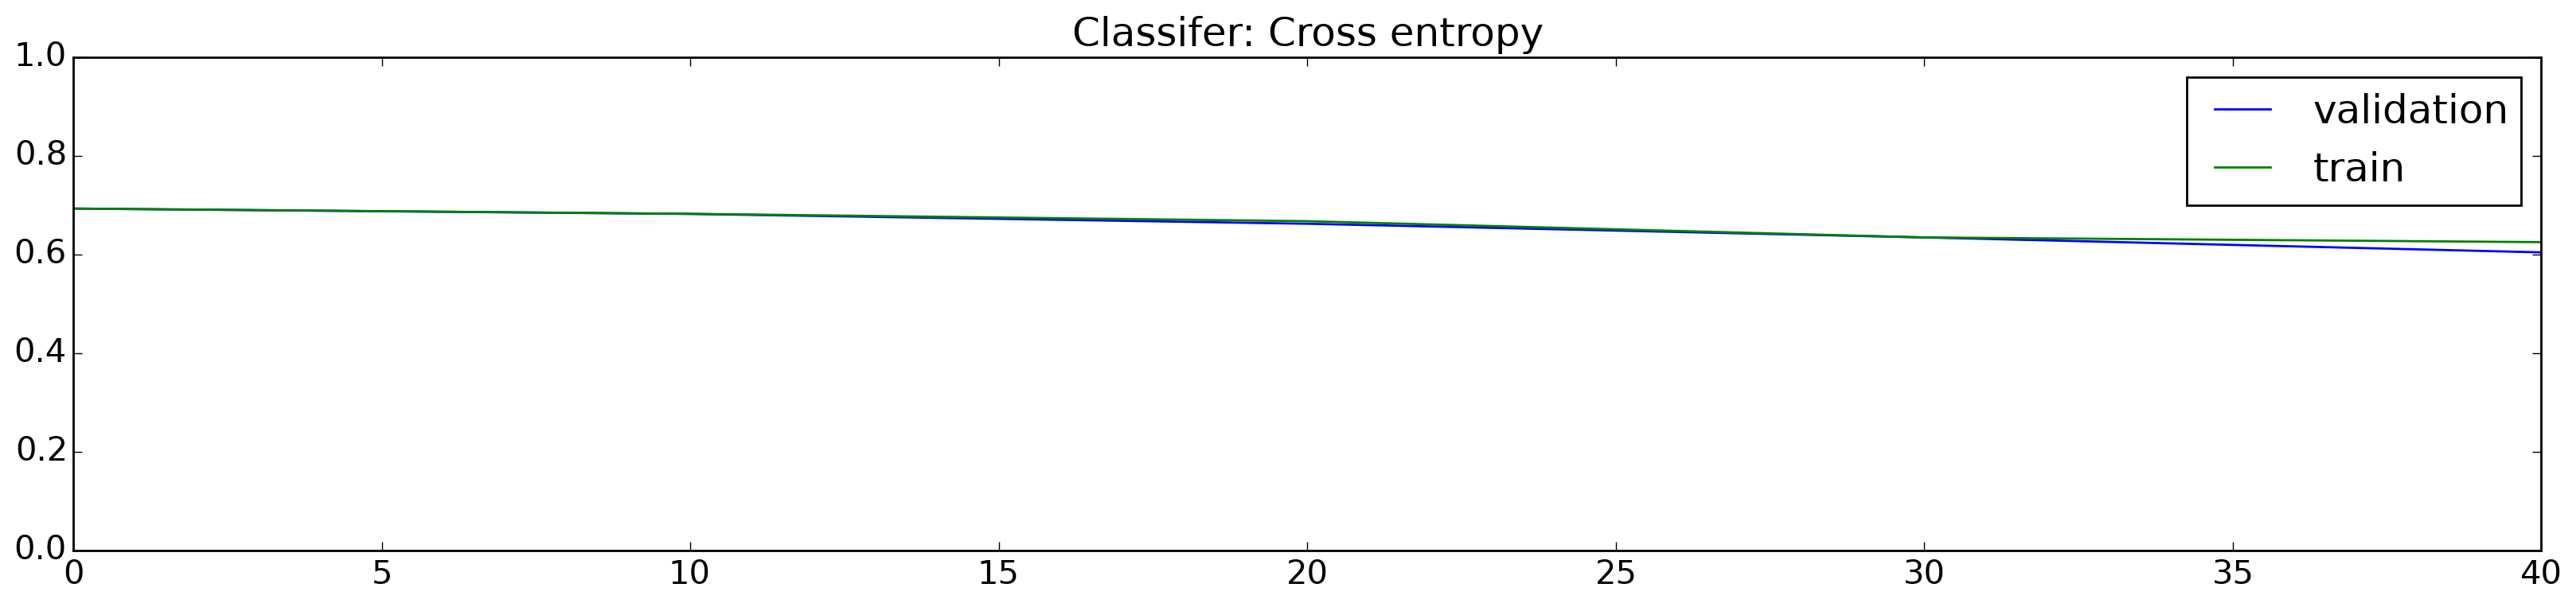

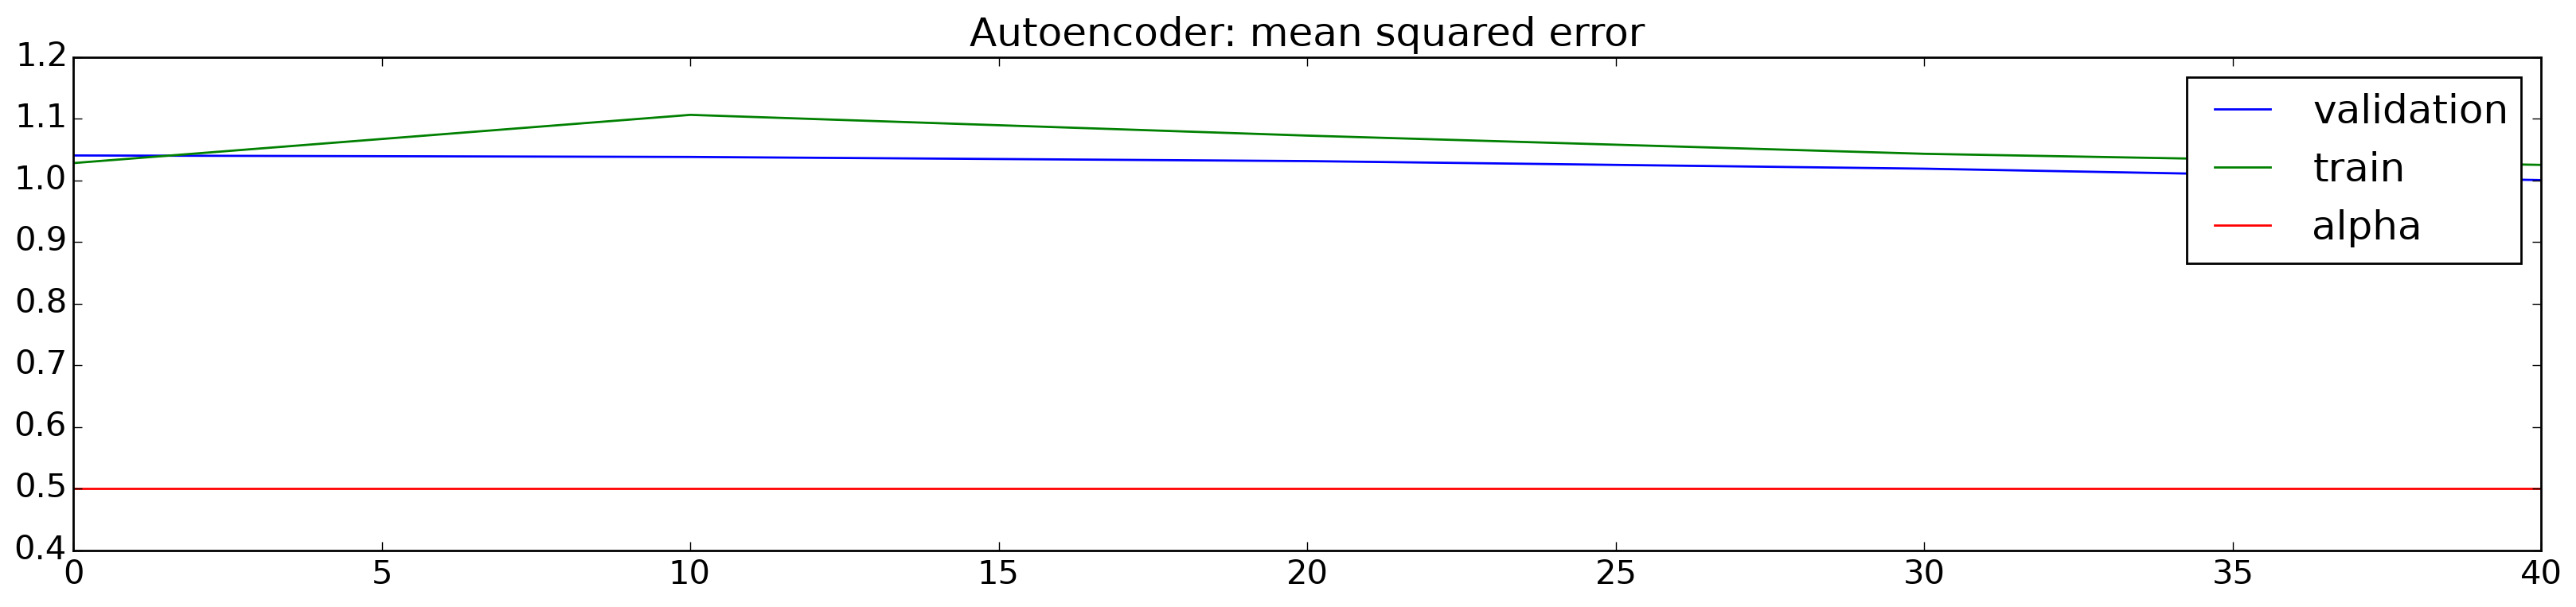

In [5]:
r.lmsq()
r.cross()
r.auto()

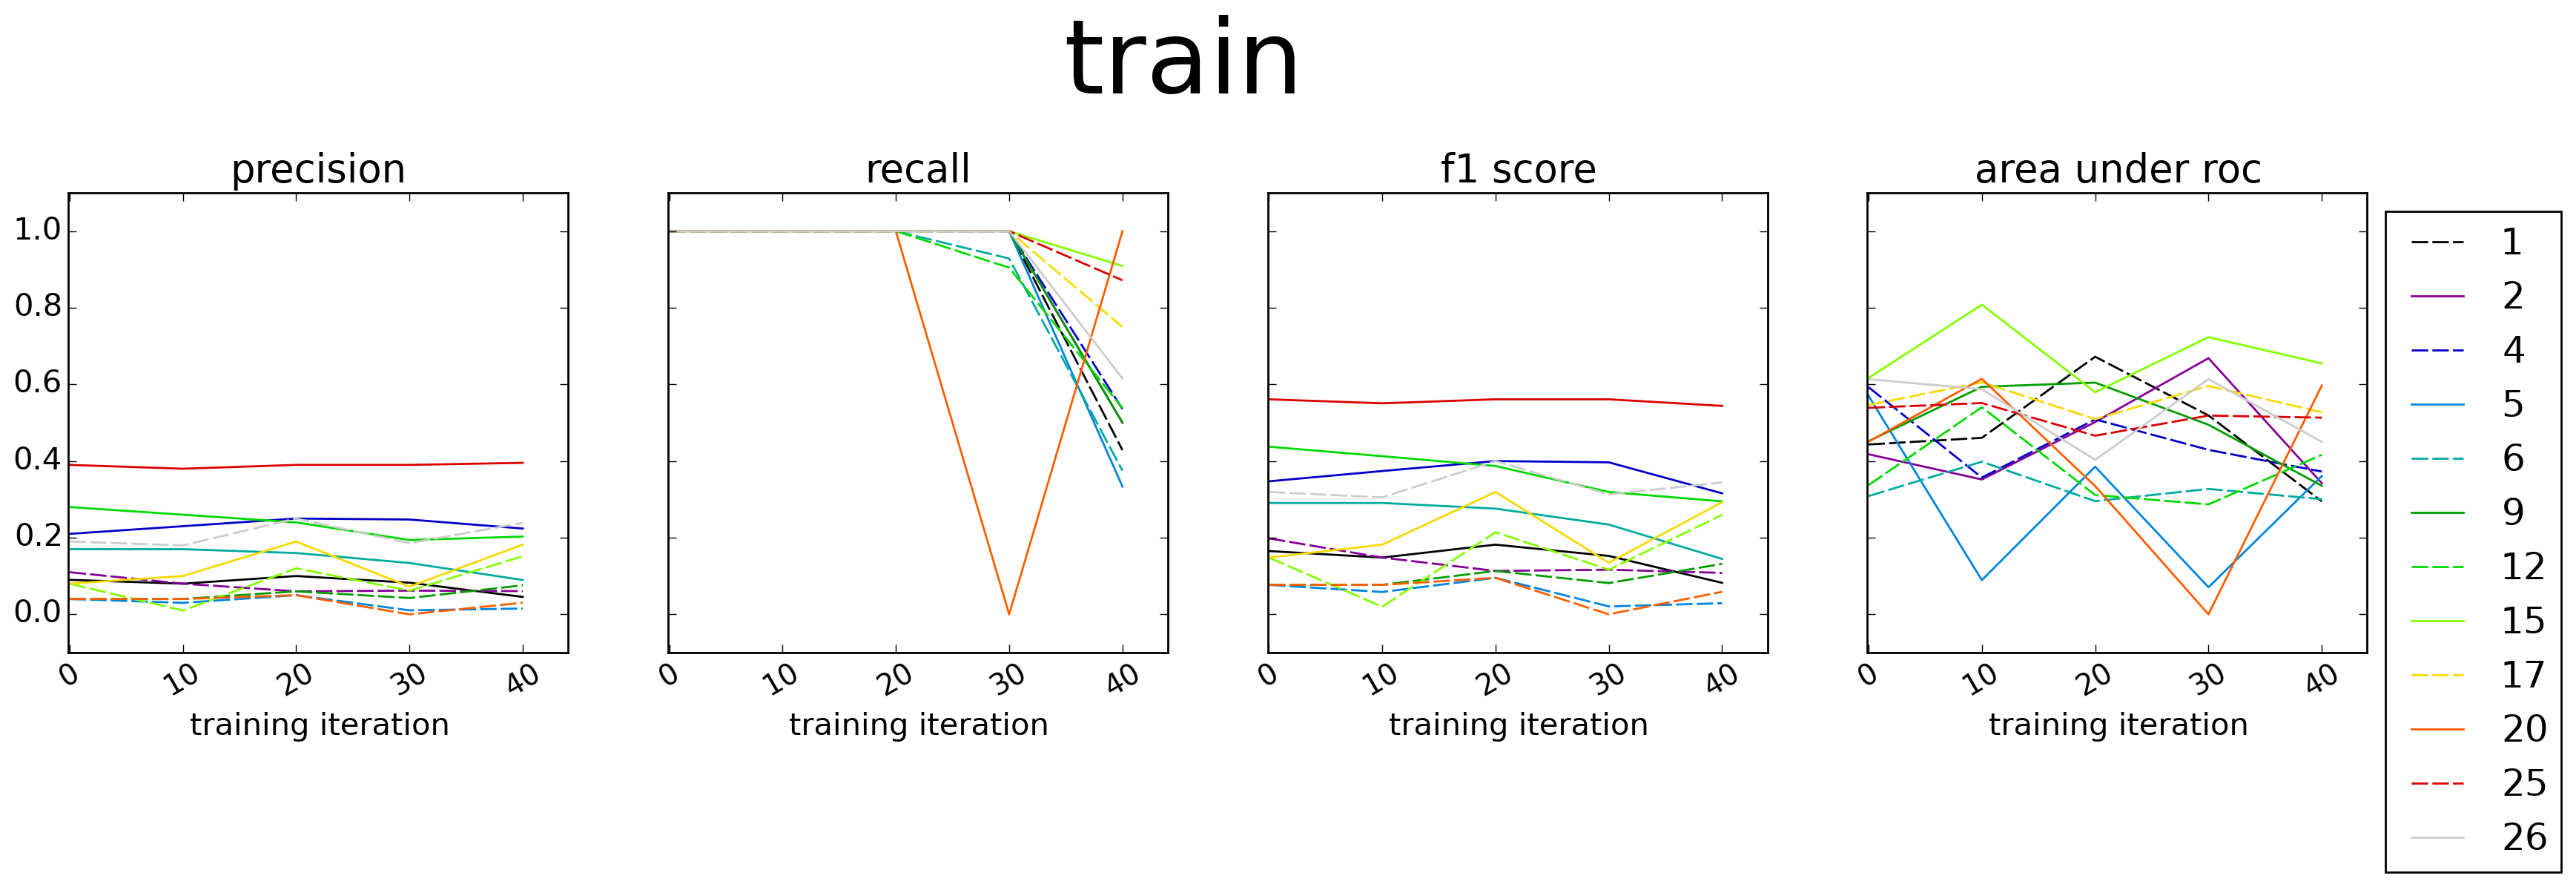

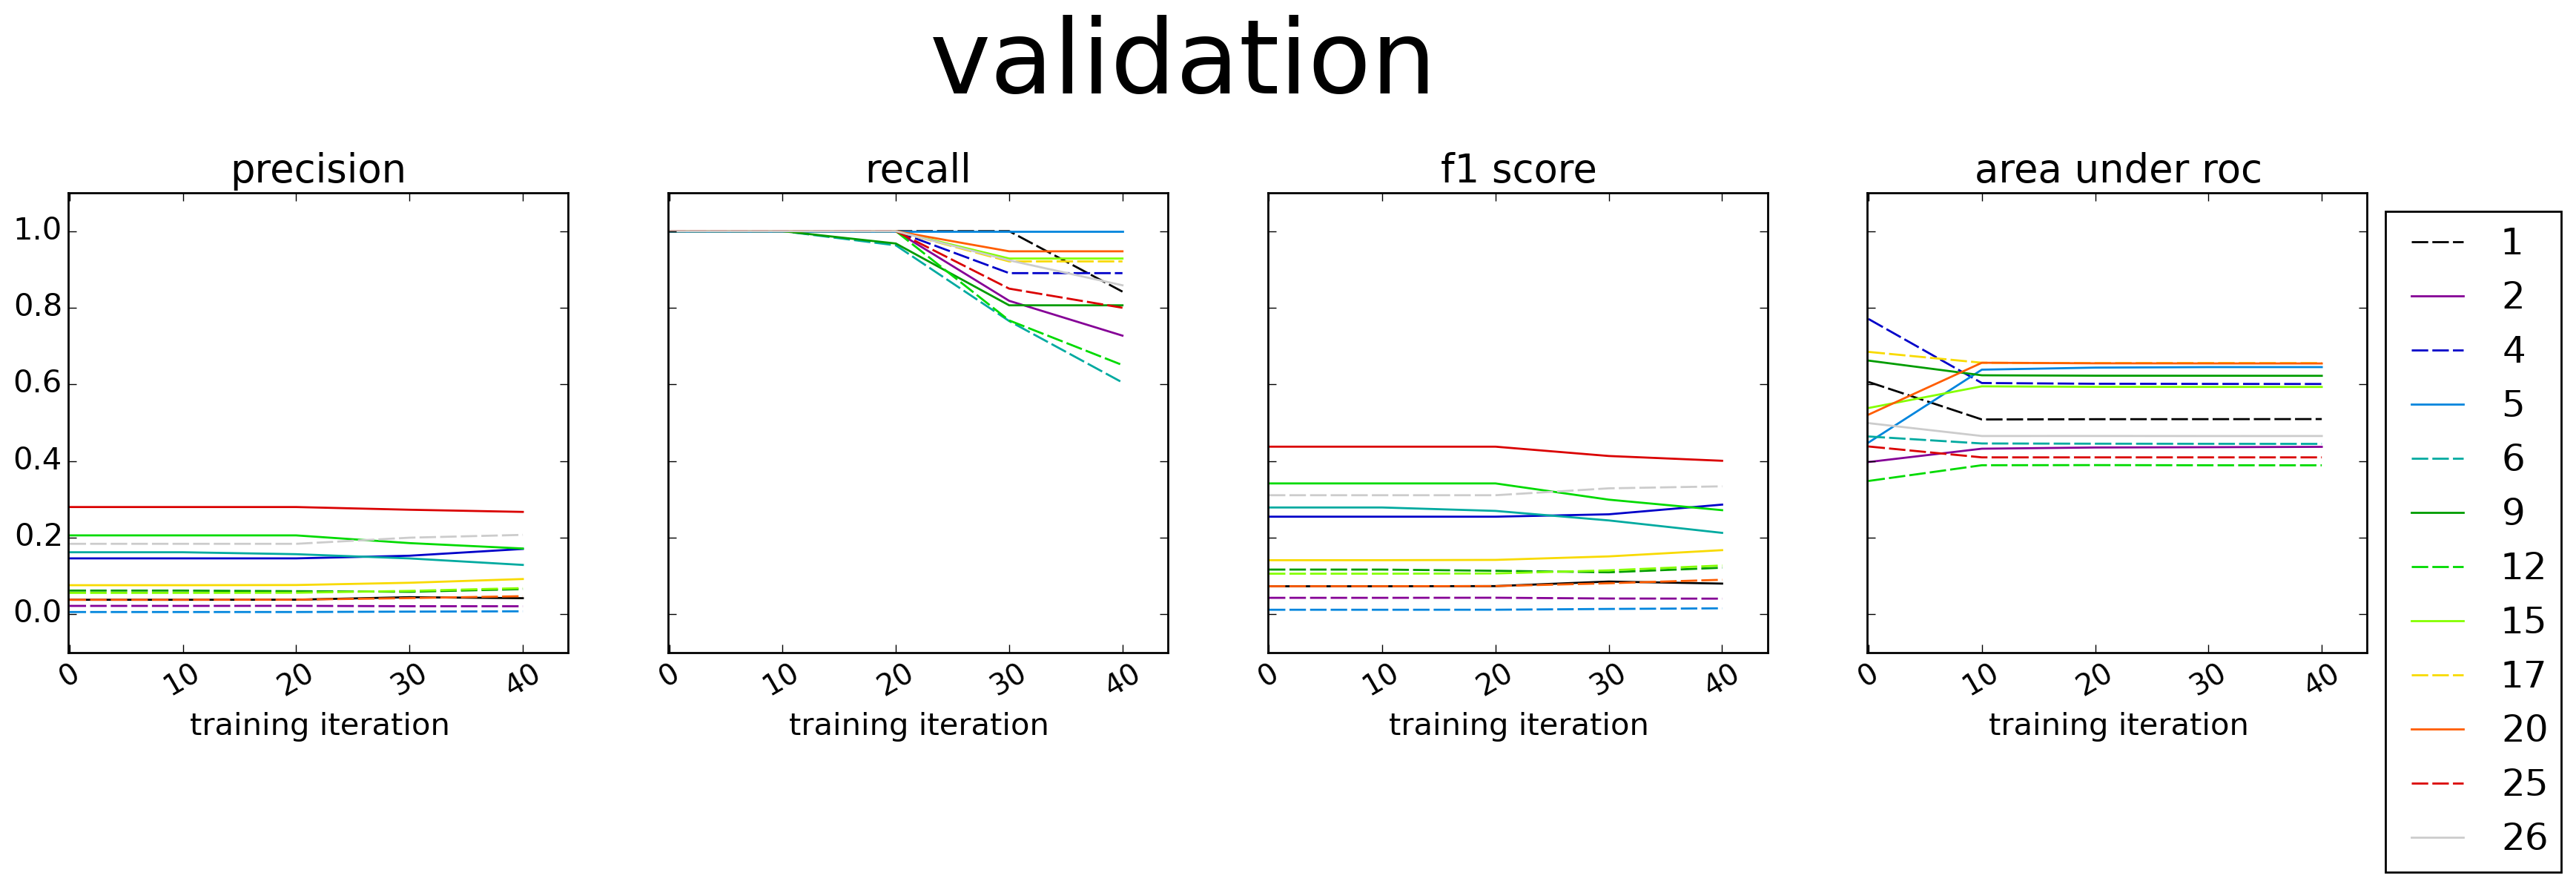

In [6]:
r.au('train',smooth=False)
r.au('validation',smooth=False)
# r.roc_plot('final')
# r.roc_plot('early')
# r.test_confusion('early')

# Test set:

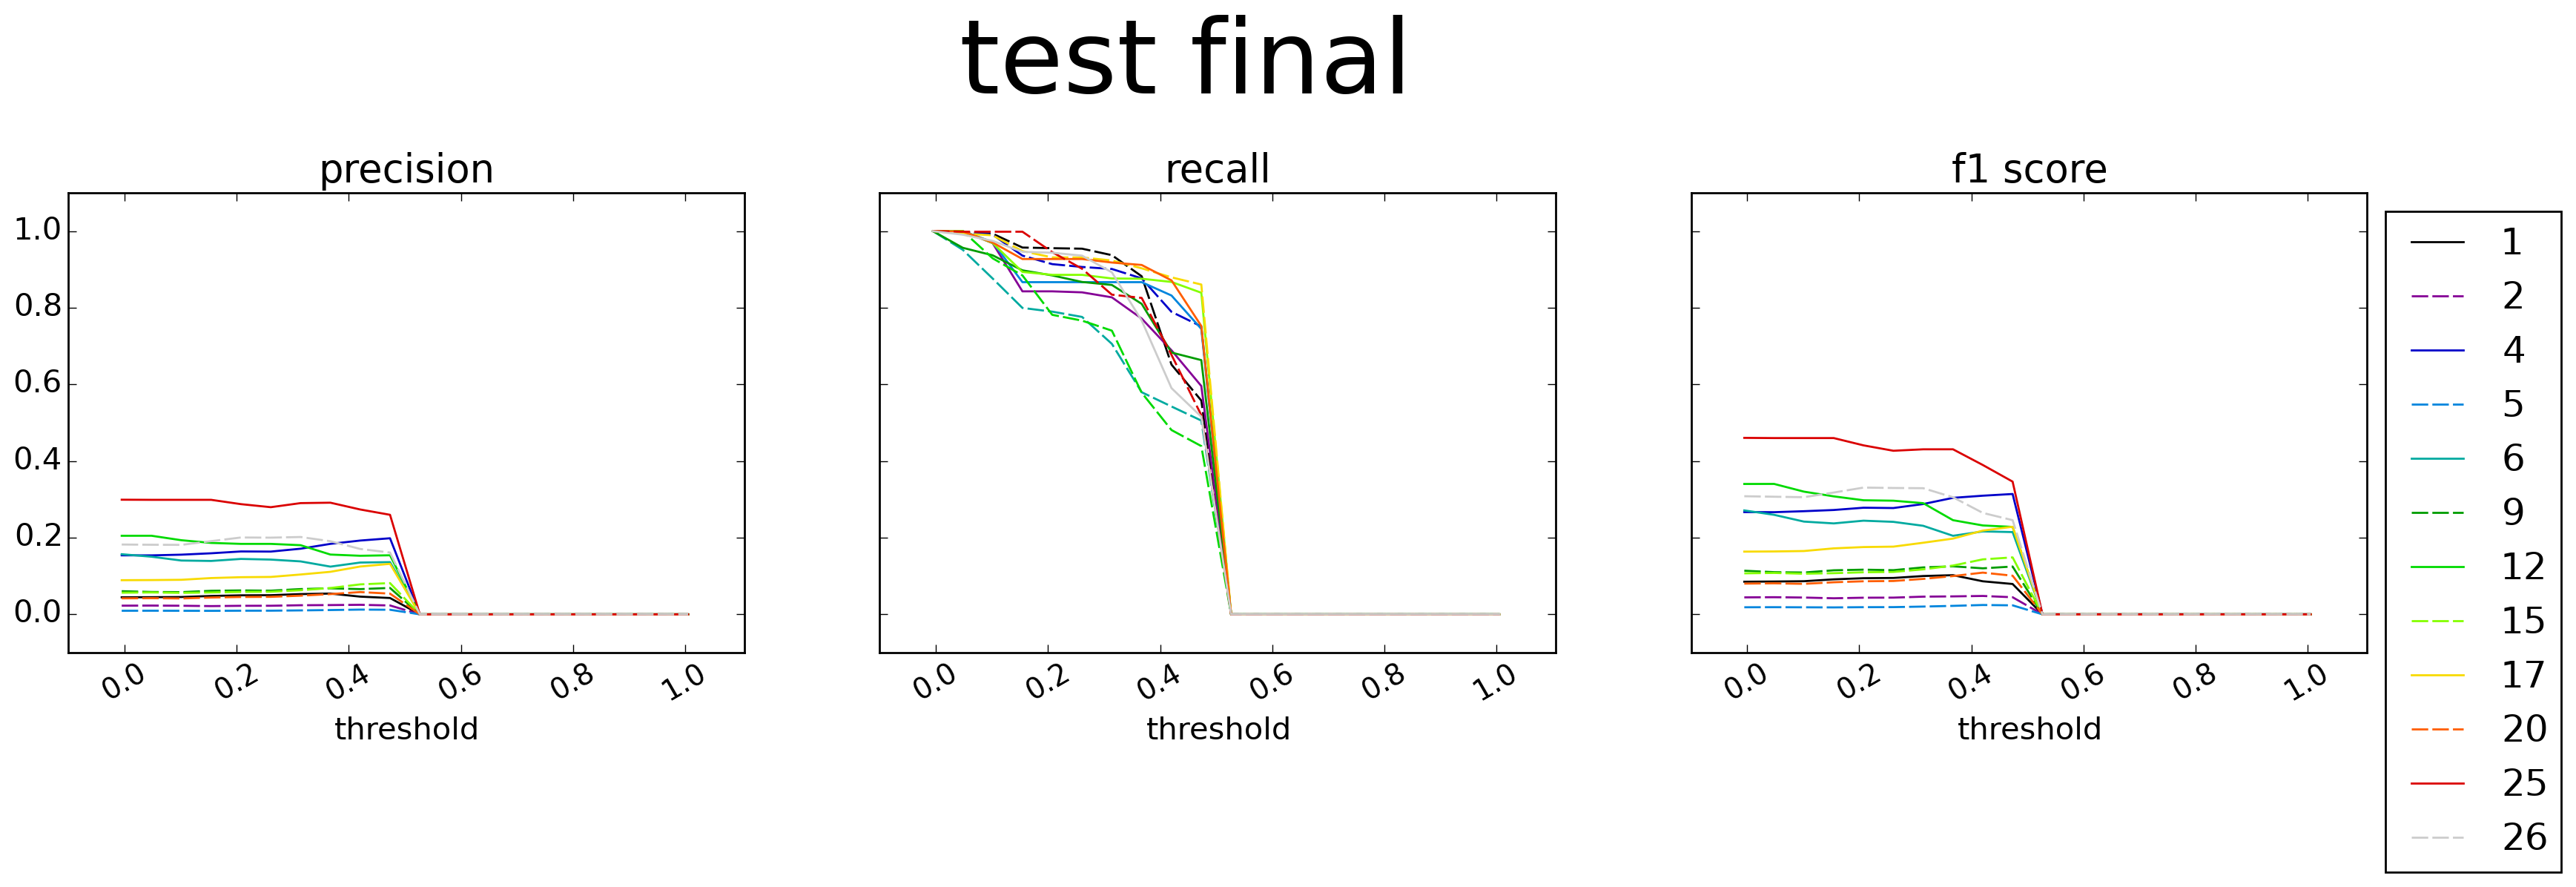

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.54 	fail 	0.1 	0.05 	1.0
2 	0.53 	fail 	0.05 	0.02 	1.0
4 	0.6 	poor 	0.31 	0.2 	1.0
5 	0.56 	fail 	0.02 	0.01 	1.0
6 	0.44 	fail 	0.27 	0.16 	1.0
9 	0.62 	poor 	0.13 	0.07 	1.0
12 	0.36 	fail 	0.34 	0.21 	1.0
15 	0.58 	fail 	0.15 	0.08 	1.0
17 	0.67 	poor 	0.23 	0.13 	1.0
20 	0.6 	poor 	0.11 	0.06 	1.0
25 	0.39 	fail 	0.46 	0.3 	1.0
26 	0.46 	fail 	0.33 	0.2 	1.0
average f1 =  0.208544777156
average roc =  0.530088851085


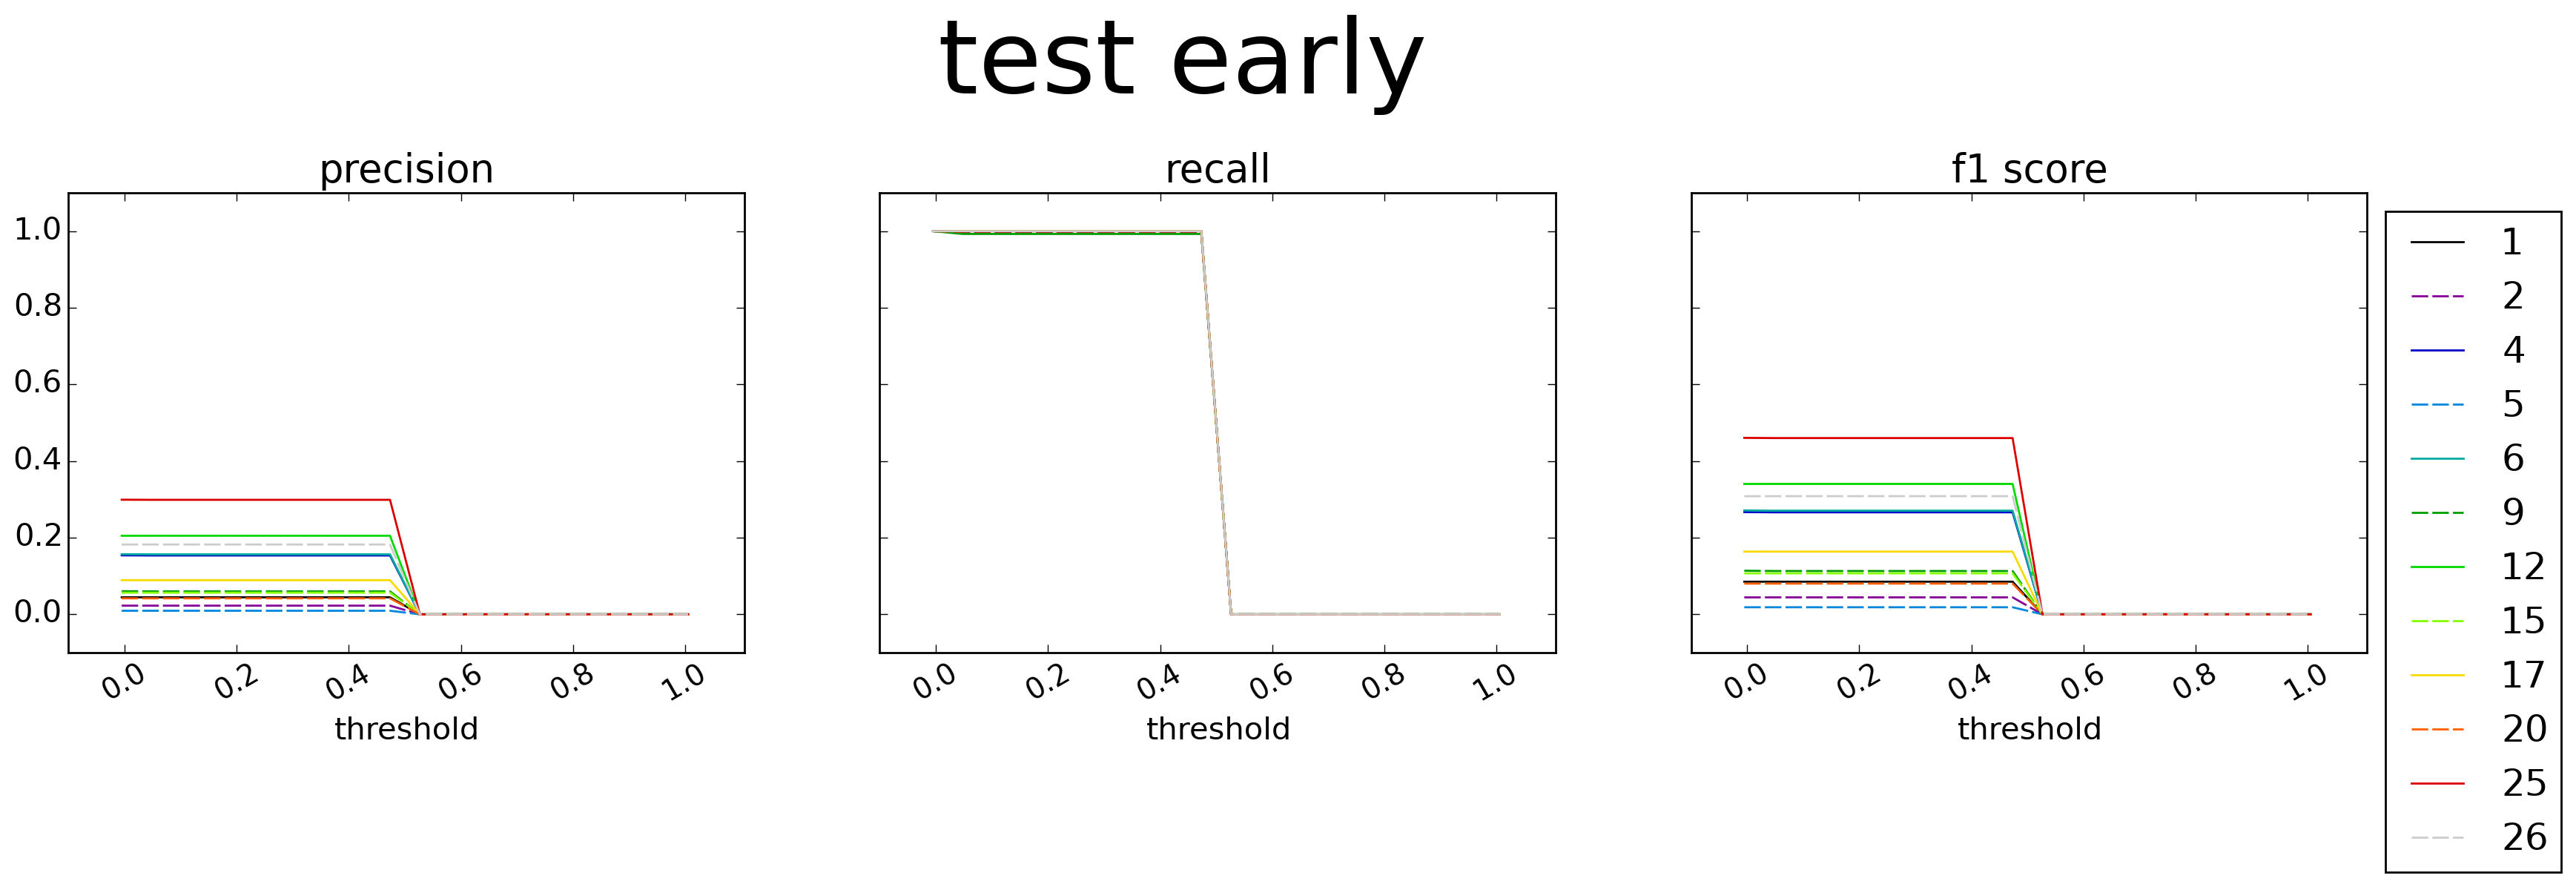

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.53 	fail 	0.09 	0.04 	1.0
2 	0.53 	fail 	0.04 	0.02 	1.0
4 	0.6 	poor 	0.27 	0.15 	1.0
5 	0.56 	fail 	0.02 	0.01 	1.0
6 	0.44 	fail 	0.27 	0.16 	1.0
9 	0.62 	poor 	0.11 	0.06 	1.0
12 	0.36 	fail 	0.34 	0.21 	1.0
15 	0.58 	fail 	0.11 	0.06 	1.0
17 	0.67 	poor 	0.16 	0.09 	1.0
20 	0.61 	poor 	0.08 	0.04 	1.0
25 	0.39 	fail 	0.46 	0.3 	1.0
26 	0.46 	fail 	0.31 	0.18 	1.0
average f1 =  0.188311970747
average roc =  0.530227331869


In [7]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

In [8]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  1 threshold:  0.37
	[  2660 	 355 	]
	[  46394 	 18421 	]
	roc:	0.54
	f1:	0.1
	p:	0.05
	r:	0.88
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  2 threshold:  0.42
	[  1057 	 477 	]
	[  41501 	 24795 	]
	roc:	0.53
	f1:	0.05
	p:	0.02
	r:	0.69
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  4 threshold:  0.47
	[  7846 	 2597 	]
	[  31680 	 25707 	]
	roc:	0.6
	f1:	0.31
	p:	0.2
	r:	0.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  5 threshold:  0.42
	[  525 	 106 	]
	[  41987 	 25212 	]
	roc:	0.56
	f1:	0.02
	p:	0.01
	r:	0.83
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  6 threshold:  -0.01
	[  10640 	 0 	]
	[  57190 	 0 	]
	roc:	0.44
	f1:	0.27
	p:	0.16
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  9 threshold:  0.37
	[  3317 	 777 	]
	[  45550 	 18186 	]
	roc:	0.62
	f1:	0.13
	p:	0.07
	r:	0.81
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.05
	[  13903 	 0 	]
	[  53897 	 30 	]
	roc:	0.36
	f1:	0.34
	p:	0.21
	r:	1

## 

(100, 11, 11)


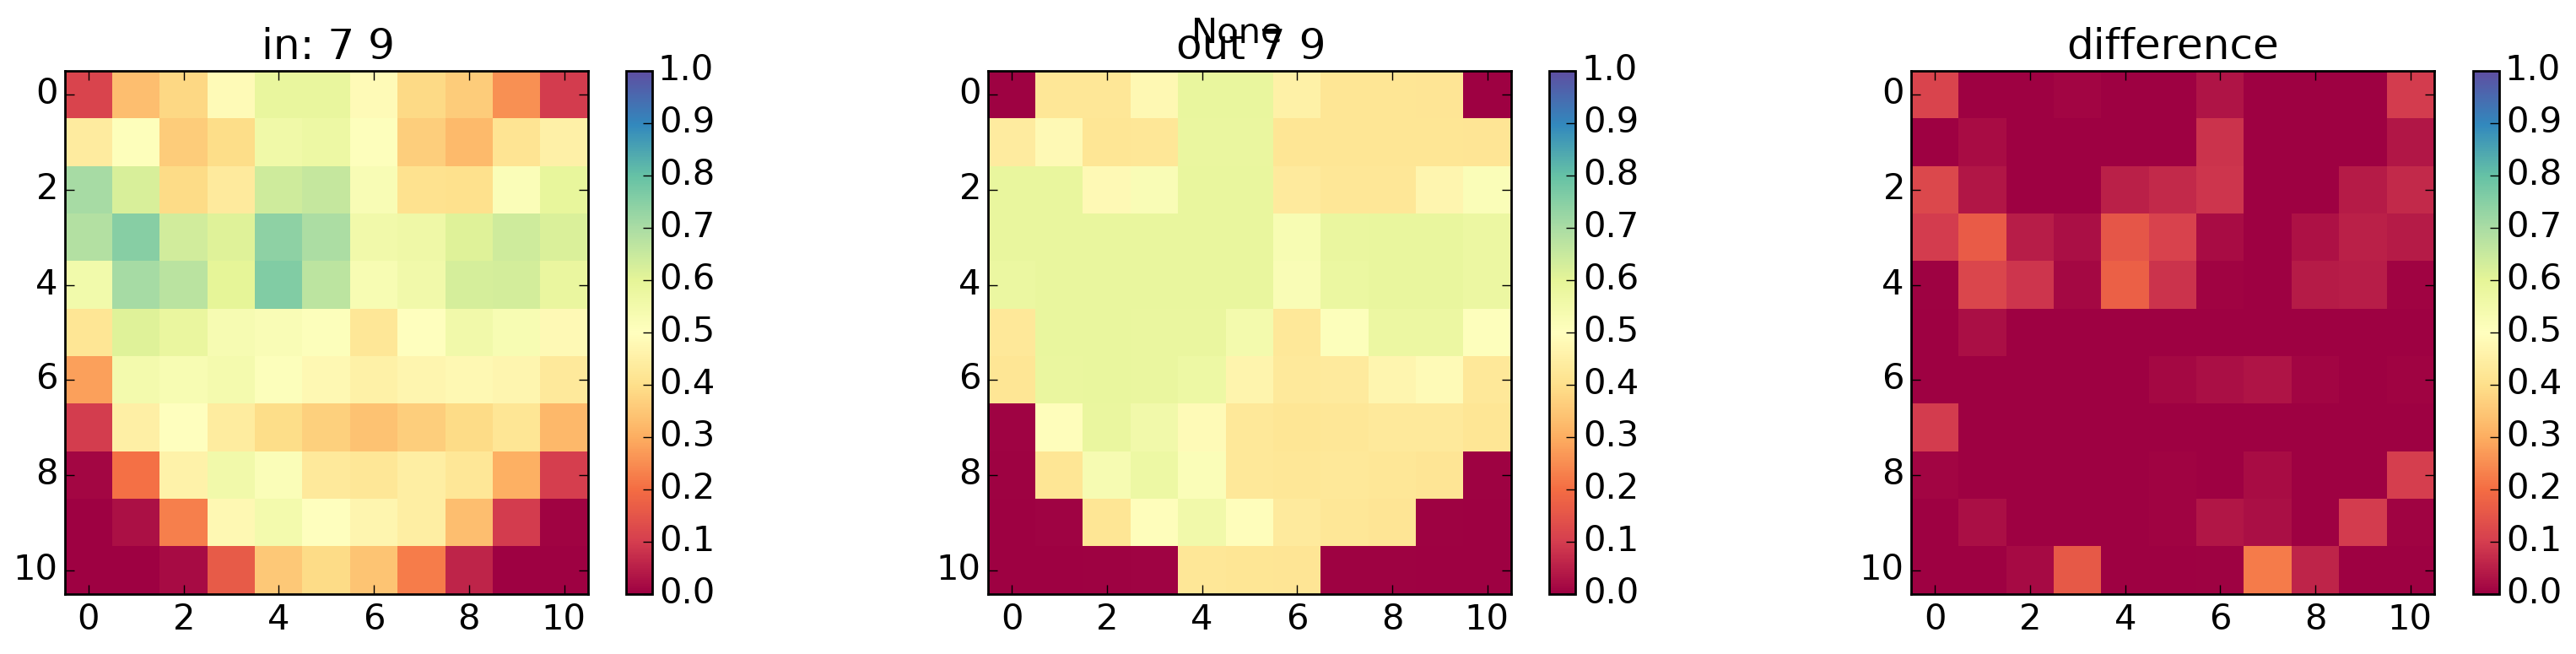

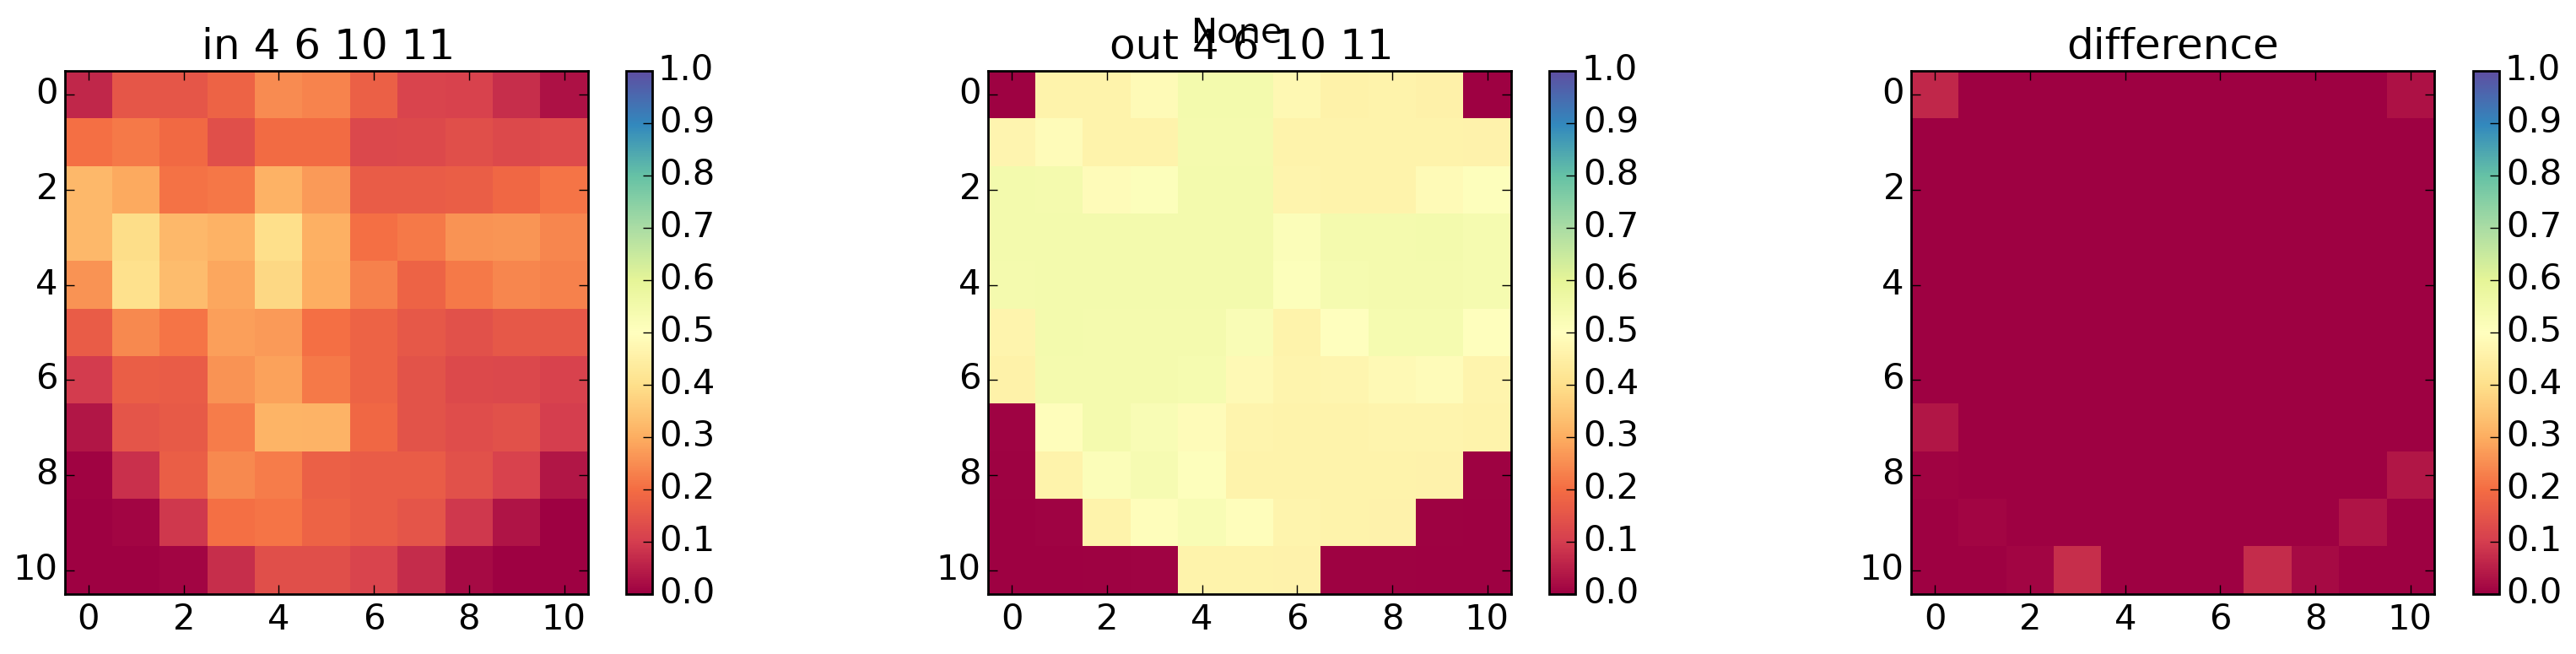

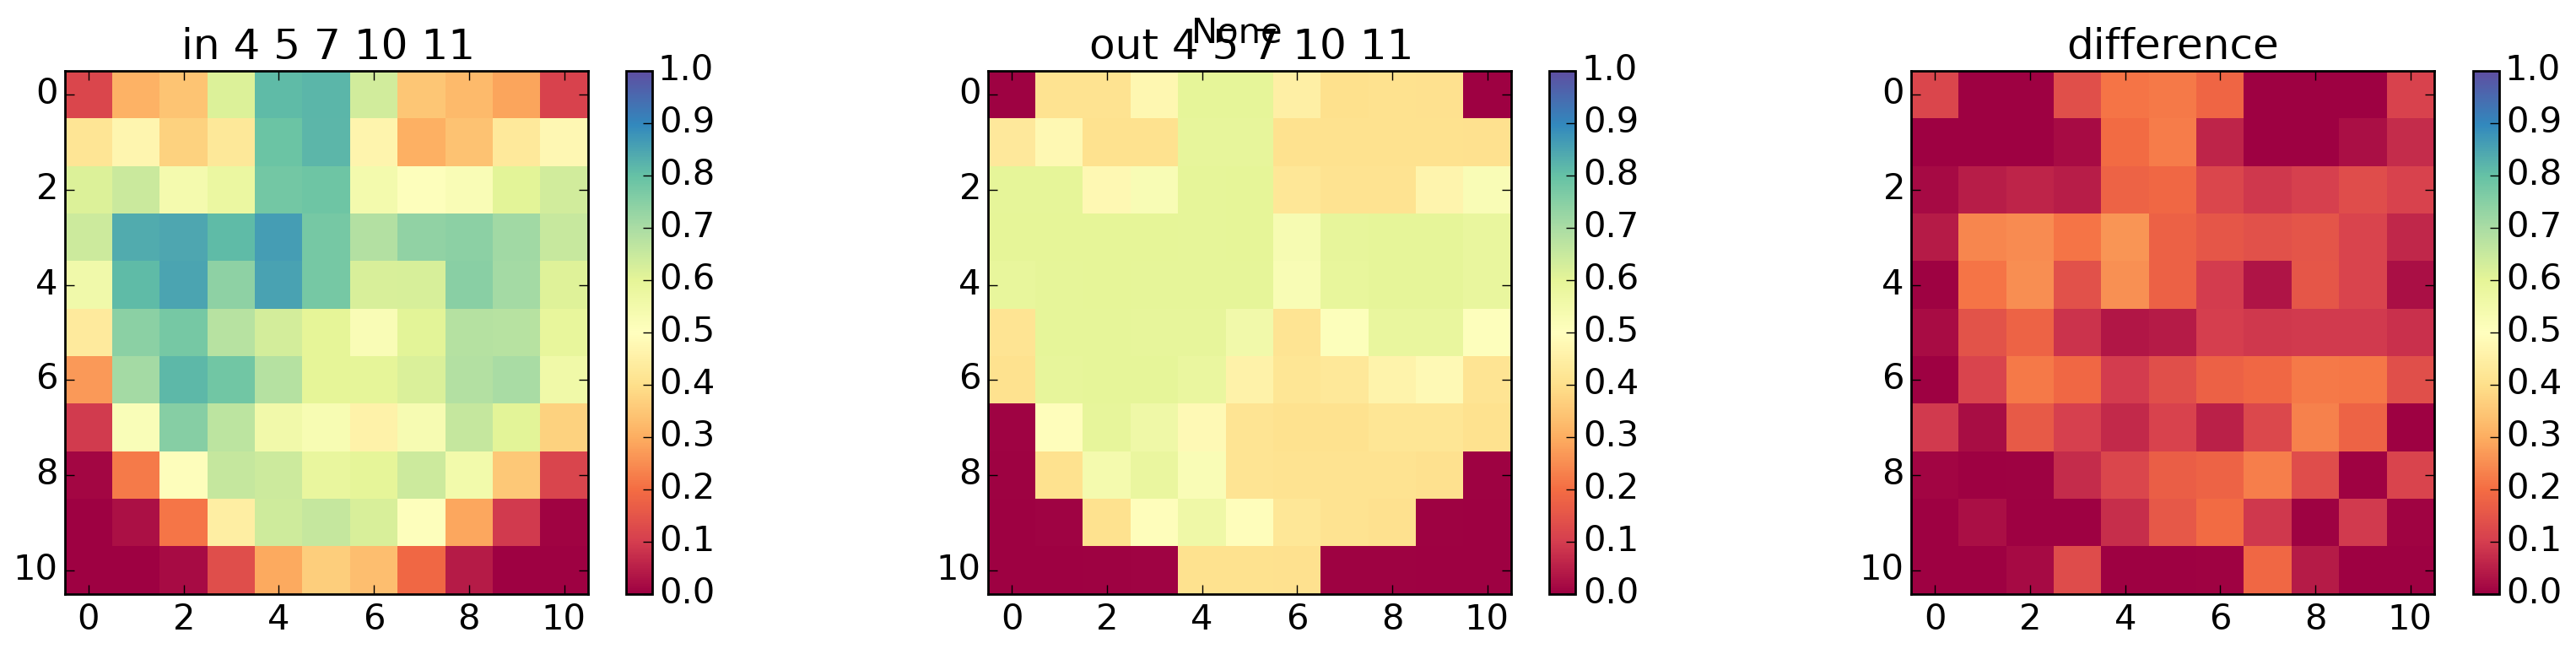

In [27]:
def mean_squared(x,y):
    return np.sqrt((np.power(x-y,2)).mean())

def auto_images(model,image,dataset):
    if dataset == 'train':
        input = model['auto_images'][0][0,image,:,:]
        output = model['auto_images'][0][1,image,:,:]
    else:
        input = model['auto_images'][1][0,image,:,:]
        output = model['auto_images'][1][1,image,:,:]
    diff = np.subtract(input,output)
    print mean_squared(input,output)
    #     print 'error = ', round(np.sqrt((diff**2).mean())*100.0,2), '%'
    fig = plt.figure()
    cmap = 'Spectral'
    plt.subplot(131)
    plt.imshow(input,interpolation='none',cmap=cmap,vmin=-1,vmax=1)
    plt.title('Input Image')
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(output,interpolation='none',cmap=cmap,vmin=-1,vmax=1)
    plt.title('Output Image')
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(diff,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
    plt.title('Difference Image')
    plt.colorbar()
    plt.show()
    
from helper import plot_images

def stra(a):
    s = ' '
    for i,number in enumerate(a):
        if number > 0:
            s += str(i) + ' '
    if s == ' ':
        return ' neutral'
    return s
            
    
def auto_images_smart(model,n):
    print model['o_small'].shape
    range = (0,1)
    images = []
    names = []
    images.append(model['i_small'][n]); names.append('in:' + stra(model['label_small'][n]))
    images.append(model['o_small'][n]); names.append('out' + stra(model['label_small'][n]))
    images.append(model['i_small'][n]-model['o_small'][n]); names.append('difference')
    plot_images(images=images,names=names,range=range)
    
    images = []
    names = []
    images.append(model['i_big'][n]); names.append('in' + stra(model['label_big'][n]))
    images.append(model['o_big'][n]); names.append('out' + stra(model['label_big'][n]))
    images.append(model['i_big'][n]-model['o_big'][n]); names.append('difference')
    plot_images(images=images,names=names,range=range)
    
    images = []
    names = []
    images.append(model['i_mean'][n]); names.append('in' + stra(model['label_mean'][n]))
    images.append(model['o_mean'][n]); names.append('out' + stra(model['label_mean'][n]))
    images.append(model['i_mean'][n]-model['o_mean'][n]); names.append('difference')
    plot_images(images=images,names=names,range=range)

auto_images_smart(r.final_model,1)

early model
0.163846290341


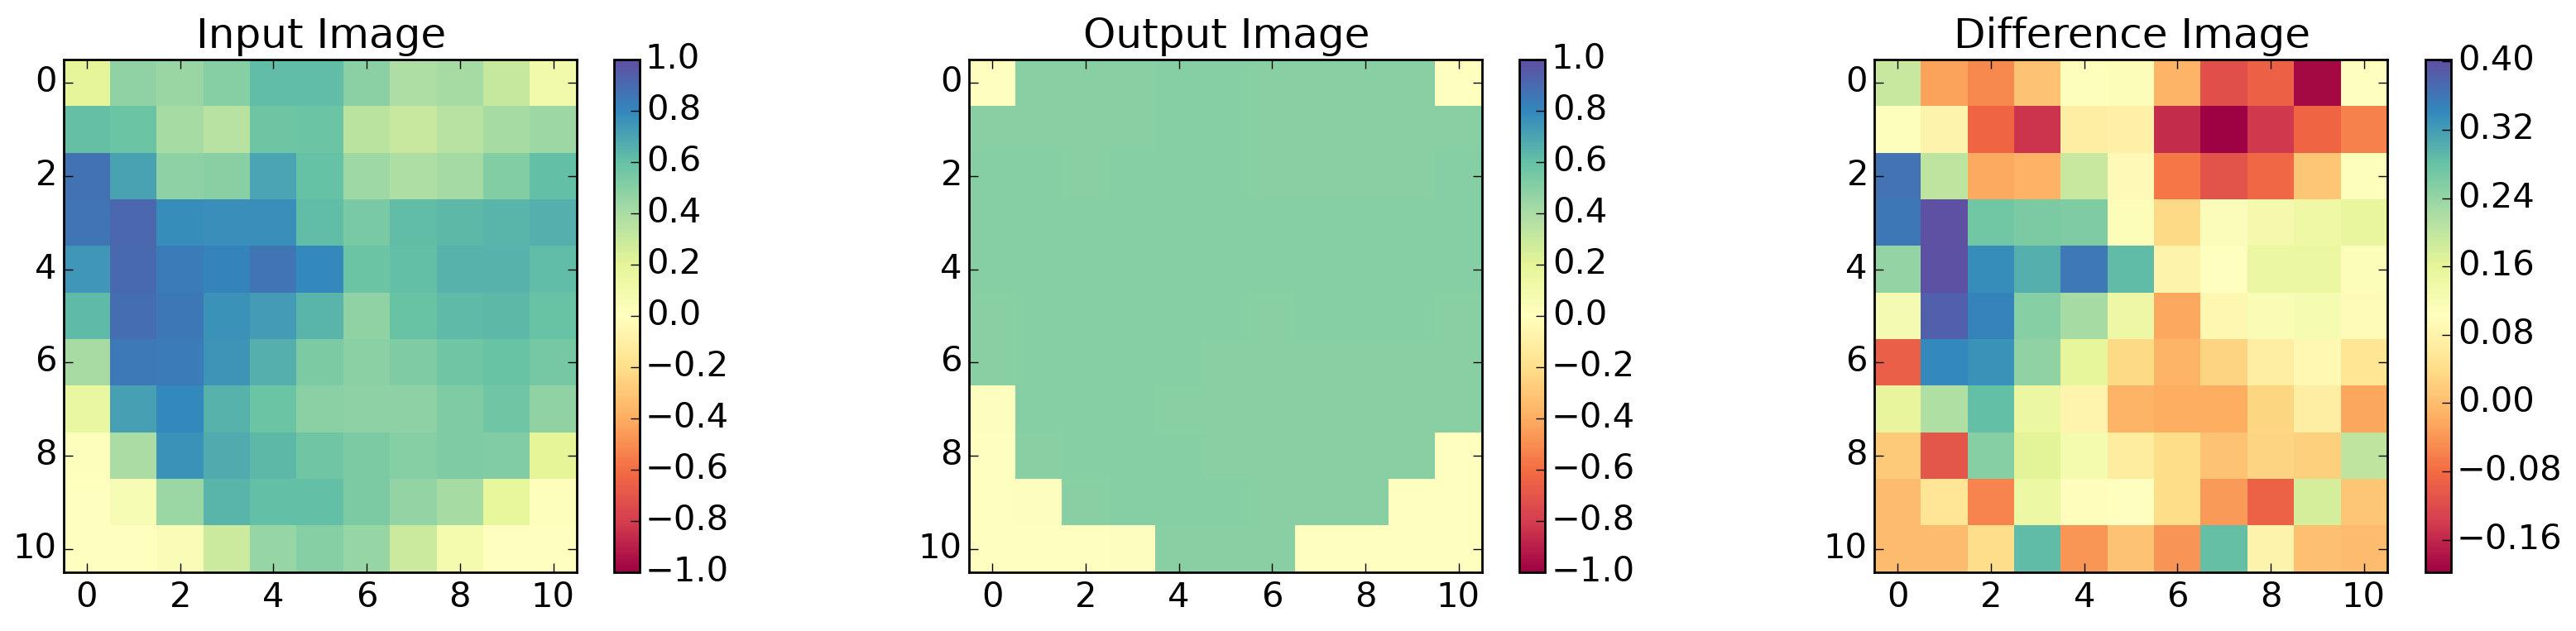

0.116761919318


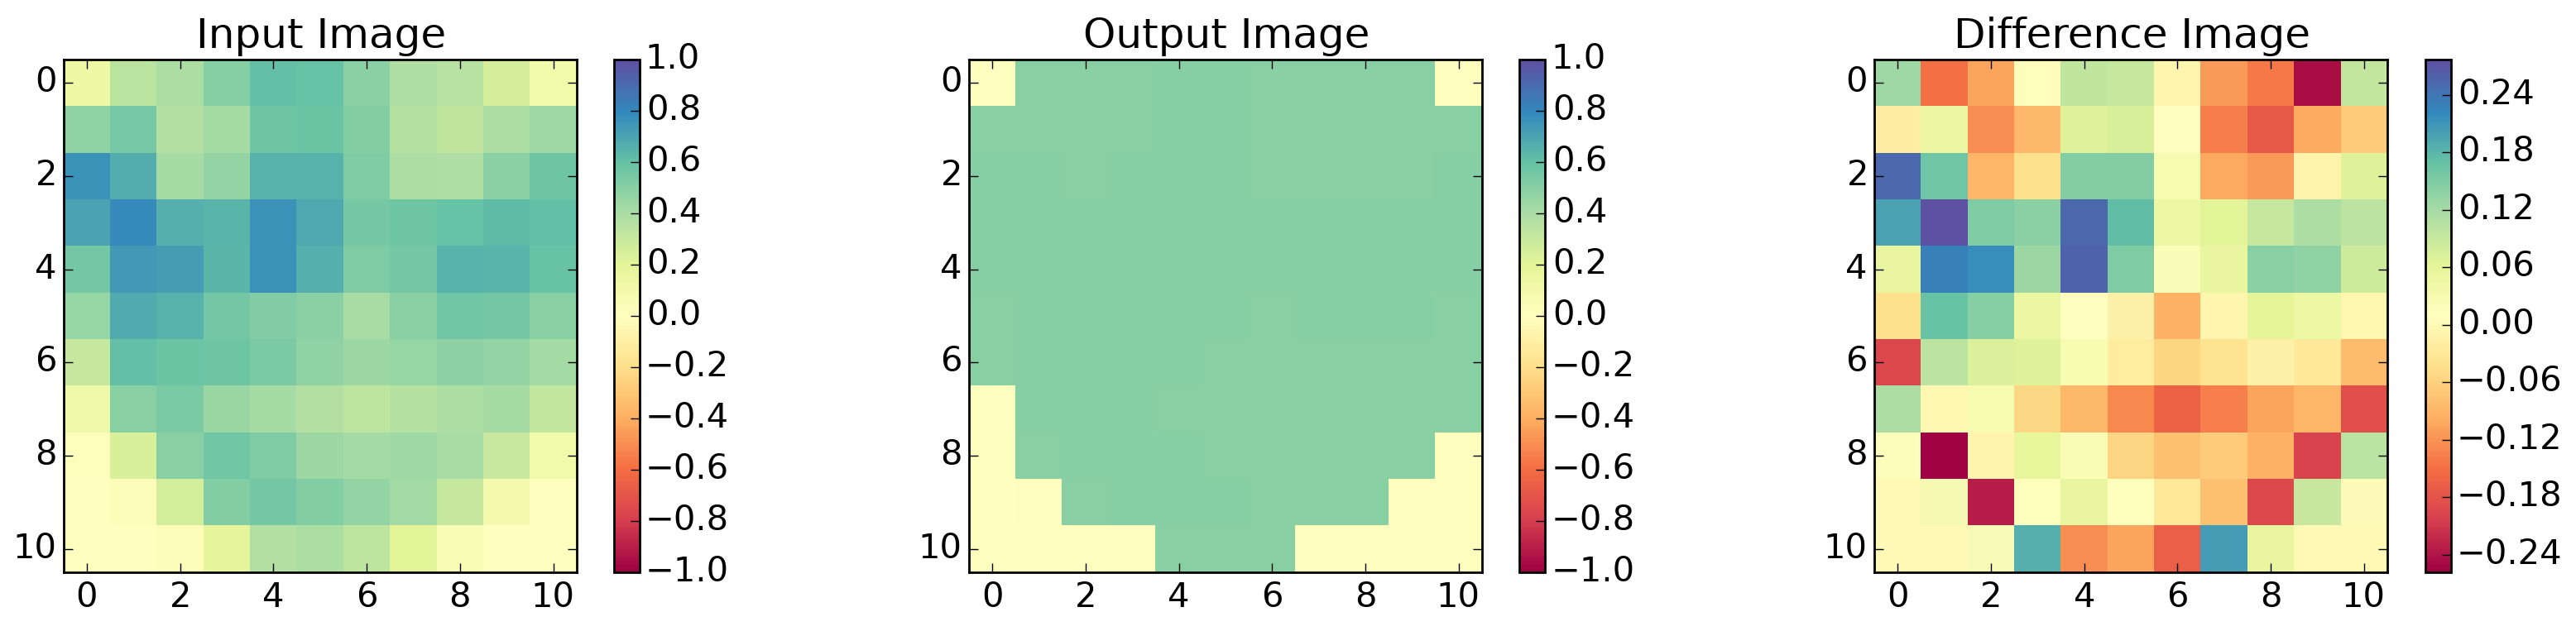

final model
0.130967672138


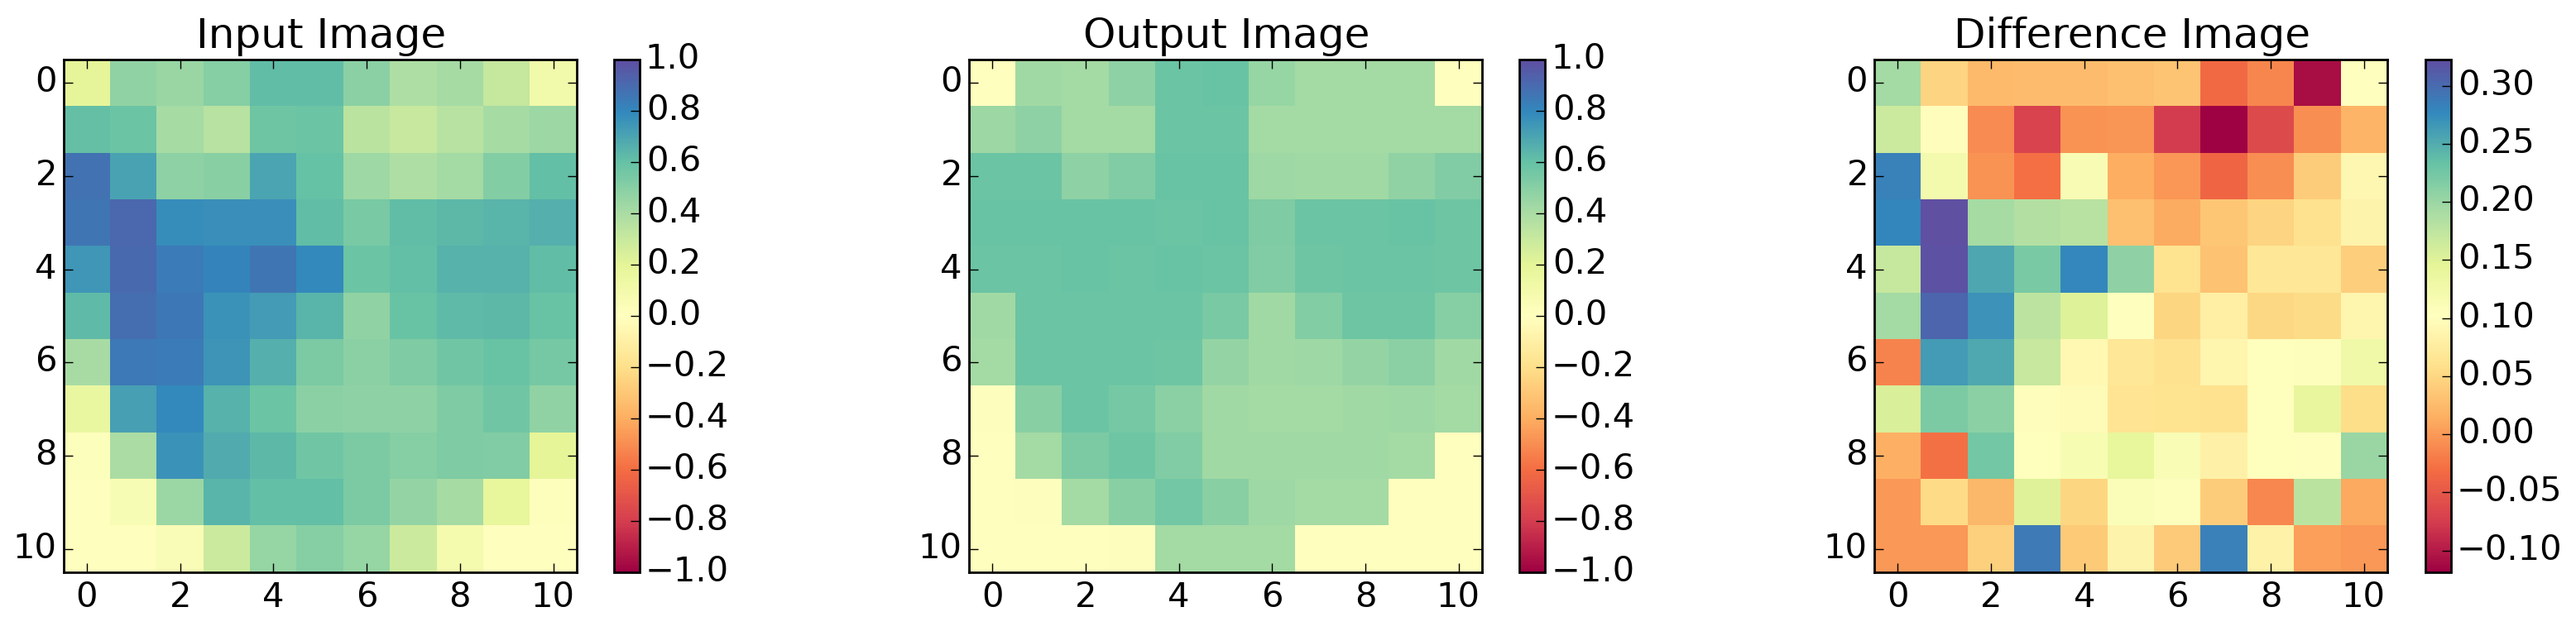

0.0733865086612


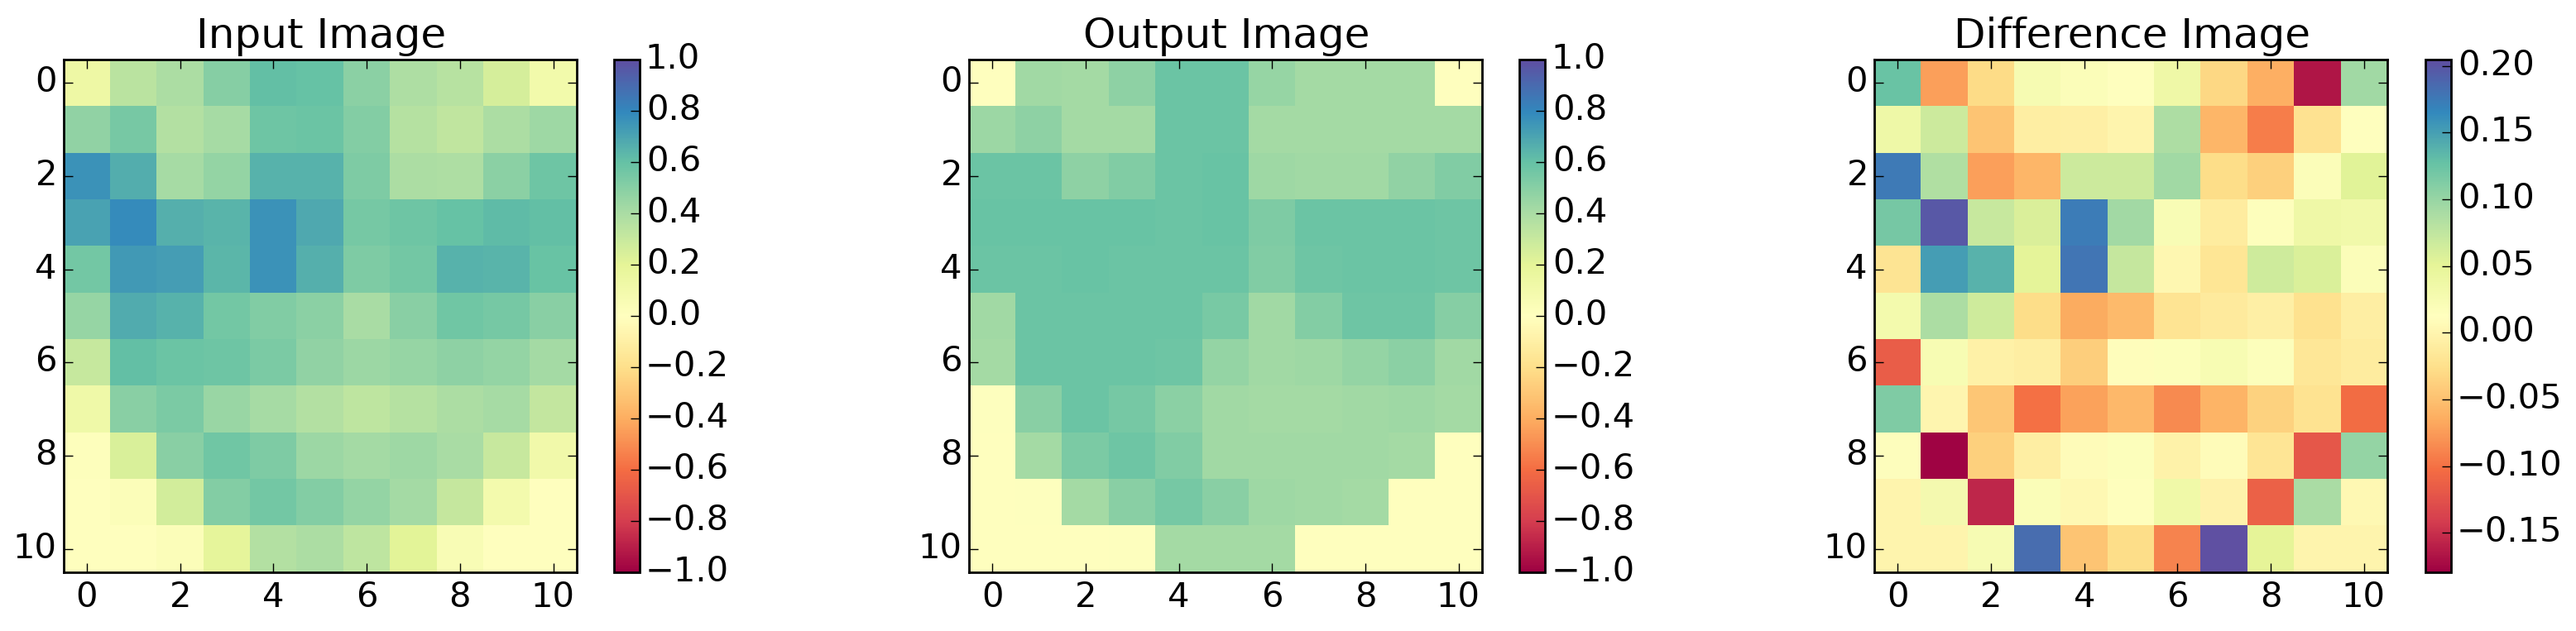

In [24]:
i = 20
print 'early model'
auto_images(r.early_model,i,'train')
auto_images(r.early_model,i,'validation')
print 'final model'
auto_images(r.final_model,i,'train')
auto_images(r.final_model,i,'validation')

In [11]:
r.print_config()

autoencoder


function,constant
constant,0.5
decoder,test
step_percent,0.8
activation,sigmoid
poly_order,1


weights


weights initialisation,"['std_dev', 0.001]"
bias initial value,0.01


global


dropout_rate,1.0
optimizer,adam
seed_randomness,True
fc2_neuron_count,0
learning_rate,0.001
batch_size,100
final_activation,softmax
fc1_neuron_count,0
seed,1
iterations,50
dump_frames,False


data


image_region,full
remove_empty_labels,False
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
scaling,none
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
disfa_au_map,"[1, 2, 4, 5, 6, 9, 12, 15, 17, 20, 25, 26]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
normalisation_type,face
threshold,1


results


early_stop_iteration,10


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.1


In [12]:
a = np.array([])
a = np.append(a,np.array([1,2,3]))
a = np.append(a,np.array([9]))
a = np.append(a,np.array([10]))
print a

[  1.   2.   3.   9.  10.]


In [13]:
print np.zeros((3,3))[:]

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
